### Muhammad Satrio Pinoto Negoro

**Linkedin:** https://www.linkedin.com/in/satriopino/

# Webscrapping using BeautifulSoup

Web scraping, also known as web harvesting or web data extraction, is the process of automatically extracting data from websites. It involves fetching a web page and extracting data from it. The data can be parsed, searched, reformatted, and copied into a spreadsheet or loaded into a database. Web scraping can be done manually, but in most cases, automated tools are preferred as they can be less costly and work at a faster rate. Web scraping is used for various purposes, including lead  generation, price monitoring, market research, and content aggregation. However, some websites use methods to prevent web scraping, such as detecting and disallowing bots from crawling their pages. In response, there are web scraping systems that rely on using techniques in DOM parsing, computer vision, and natural language processing to simulate human browsing to enable gathering web page content for offline parsing

## Dependencies

Actually to follow this module you only need to install beautifulsoup4 with `pip install beautifulsoup4` and you are good to go. But here some libraries that needed to be installed first that I use at bis module : 

- beautifulSoup4
- pandas
- matplotlibs

## Background

At this project we try to scrap Inflation rate data from https://pusatdata.kontan.co.id/ data center website. "https://pusatdata.kontan.co.id/" is a financial and market data portal that provides access to various financial data, market analysis, and related information. The website offers up-to-date news, data, and analysis on various topics such as investments, national and international markets, finance, and economics. It also provides information on interest rates, exchange rates, and stock prices. The website appears to be a reliable source of financial and market data for investors, traders, and anyone interested in financial news and analysis. We will try to scrap this sites for educational purpose only.

A lot of you might ask why we need to scrap this data from the sites while it already have a good enough visualisation. Let's say we have task to make a forecast on Inflation rate. To do that we need to have the data, and scrapping is a good way to collect the data we don't have from public. 

We will scrap 5 points from this sites. That is Date, Inflation value MoM, and Inflation value YoY. 

## What is BeautifulSoup

Beautiful Soup is a Python library for pulling data out of HTML and XML files. Beautiful Soup 3 only works on Python 2.x, but Beautiful Soup 4 also works on Python 3.x. Beautiful Soup 4 is faster, has more features, and works with third-party parsers
like lxml and html5lib.

Since beautifulsoup used to pull the data out of a HTML, so first we need to pull out the html first. How we do it? We will use default library `request`. 

So all this code is doing is sending a GET request to spesific address we give. This is the same type of request your browser sent to view this page, but the only difference is that Requests can't actually render the HTML, so instead you will just get the raw HTML and the other response information.

We're using the .get() function here, but Requests allows you to use other functions like .post() and .put() to send those requests as well. At this case we will going to the Kontan data center Inflation rate page, you can click [here](https://pusatdata.kontan.co.id/makroekonomi/inflasi) to follow what exactly that link goes to. 

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

## Getting the HTML from the Webpage

In [1]:
url = 'https://pusatdata.kontan.co.id/makroekonomi/inflasi'

In [2]:
import requests

In [3]:
url_get = requests.get(url)

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [5]:
url_get.content[:500]

b'<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\n<html xmlns="http://www.w3.org/1999/xhtml">\n<head>\n\t<meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\n\t<meta name="viewport" content="width=device-width, initial-scale=1.0">\n    <link rel="shortcut icon" href="//assets.kontan.co.id/favicon.ico"/>\n\t<link rel="stylesheet" href="//assets.kontan.co.id/debar/pusatdata/css/font-awesome/css/font-awesome.min.css">'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. But we’ll only ever have to deal with about four kinds of objects: `Tag`, `NavigableString`, `BeautifulSoup`, and `Comment`. But at this project we will only use `BeautifulSoup`.

Let's make Beautiful soup object and feel free to explore the object here.

In [6]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


Let's see how our beautifulsoup looks like. As you can see, the content is the same with our get_url object but it's tidier. Also beautifulsoup give us method to make it even more prettier, for tidyness purpouse we slice to only see first 500 character.

In [8]:
print(soup.prettify()[:500])

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html xmlns="http://www.w3.org/1999/xhtml">
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <link href="//assets.kontan.co.id/favicon.ico" rel="shortcut icon"/>
  <link href="//assets.kontan.co.id/debar/pusatdata/css/font-awesome/css/font-awesome.min.css" rel="stylesheet


### Getting right key to extract right information

Now we already have a tidier html, now we should search the lines that we want to use. Let's back to our web page first.

<img src="asset/webpusatdatakontan.png">

The information that we need are the Date, Inflation value MoM, and Inflation value YoY which contain in the table. To know which part of the code refer to that table, we can just move our cusor there, right click, and inspect element. Then we will see something like this.

<img src="asset/tableinflation.png">

From inspect element we know that we need to find the line table with class `baris-scroll`. We can use the find method at our beautifusoup object. Let's also call our object to see what we get.

## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. (please change this markdown with your explanation)

In [10]:
table = soup.find("div", attrs={'class':'baris-scroll'})
print(table.prettify()[:500])

<div class="baris-scroll">
 <div class="tabel-body">
  <div class="kol-konten3-1">
   31/10/2023
  </div>
  <div class="kol-konten3-2">
   <div class="w-30-px txtright center-max">
    0,17
   </div>
  </div>
  <div class="kol-konten3-3">
   <div class="w-30-px txtright center-max">
    2,56
   </div>
  </div>
 </div>
 <div class="tabel-body">
  <div class="kol-konten3-1">
   30/09/2023
  </div>
  <div class="kol-konten3-2">
   <div class="w-30-px txtright center-max">
    0,19
   </div>
  </div


As we can see from the line we just extract, we get all the content we needed. As for what is table, The `div` tag defines a division or a section in an HTML document. It is easily styled by using the class or id attribute, Any sort of content can be put inside the `div` tag. 
    
The `find()` function can help you to get you the part of the html code that you needed. While most of the html is contained in `div` you can differsiate them with help of `attrs=`, you can insert anything that in the `div` a the attrs to help you find the part you needed. 

Now, we need to get 5 information, that is the Date, Inflation value MoM, and Inflation value YoY. Which you can read from above code, Date is contained within `div` with "kol-konten3-1", Inflation value MoM is contained within `div` in "kol-konten3-2", and Inflation value YoY is contained within `div` in "kol-konten3-3" sequentially and repeatedly. 
    
Now I will introduce you to other useful function from beautiful soup, that's `find_all`. While the `find` fuction method is used for finding out the **first tag** with the specified name or id and returning an object of type bs4. The find_all method is used for finding out **all tags** with the specified tag name or id and returning them as a list of type bs4.

For example I'll try to extract the data of date information from the html. You can use slicer to help you.

In [11]:
table.find_all('div', attrs={'class':'kol-konten3-1'})[:5]

[<div class="kol-konten3-1">31/10/2023</div>,
 <div class="kol-konten3-1">30/09/2023</div>,
 <div class="kol-konten3-1">31/08/2023</div>,
 <div class="kol-konten3-1">31/07/2023</div>,
 <div class="kol-konten3-1">30/06/2023</div>]

In [12]:
table.find_all('div', attrs={'class':'kol-konten3-1'})[0].text

'31/10/2023'

As you can see get already get the necessary key to extract all needed data. To get the only text information you can add `.text`. Remember you need to only get one information before you use `.text` otherwise it will return error.

### Extracting the Information

Now all the `beautiful soup` part is over. All left to do is doing some programming to extract all the data automaticly, you can do this manualy at this part but if your data too long I advice you use loop. I'll show you how to make looping for extracting the data, but before that let's check how long is our data to help our looping process. Since `find_all` will always return data in format list, we will use `len()` to check how long is our list.

Finding row length of Date.

In [15]:
row = table.find_all('div', attrs={'class':'kol-konten3-1'})
row_length = len(row)
row_length

50

Now we know the length of our data, now here what we will do for the looping process. 

Here what the looping do to scrap the information: 

- First we need to establish a placeholder to receive the information that we scrap. 
- We named our placeholder `temp` and it's a list. 
- Then we will make a loop from one until the the length of the table row, 
- we will find is all cell of the columns which contain Date, Inflation value MoM, and Inflation value YoY. 
- Then we will append it to our tuple that we prepared before, 
- every one iteration we will scrap one line of the table.  

In [17]:
temp = [] #init
for i in range(0, row_length):
    #get period 
    date = table.find_all('div', attrs={'class':'kol-konten3-1'})[i].text

    #get Inflation value MoM
    inflation_rate_mom = table.find_all('div', attrs={'class':'kol-konten3-2'})[i].text
    inflation_rate_mom = inflation_rate_mom.strip() #to remove excess white space
    
    #get Inflation value YoY
    inflation_rate_yoy = table.find_all('div', attrs={'class':'kol-konten3-3'})[i].text
    inflation_rate_yoy = inflation_rate_yoy.strip() #to remove excess white space
    
    temp.append((date, inflation_rate_mom, inflation_rate_yoy))
        
temp[:500]

[('31/10/2023', '0,17', '2,56'),
 ('30/09/2023', '0,19', '2,28'),
 ('31/08/2023', '0,02', '3,27'),
 ('31/07/2023', '0,21', '3,08'),
 ('30/06/2023', '0.14', '3.52'),
 ('31/05/2023', '0.09', '4.00'),
 ('30/04/2023', '0,33', '4,33'),
 ('31/03/2023', '0.18', '4.97'),
 ('28/02/2023', '0,16', '5,47'),
 ('31/01/2023', '0,34', '5,28'),
 ('31/12/2022', '0,66', '5,51'),
 ('30/11/2022', '0,09', '5,42'),
 ('31/10/2022', '0,11', '5,71'),
 ('30/09/2022', '1,17', '5,95'),
 ('31/08/2022', '0,21', '4,69'),
 ('31/07/2022', '0,64', '4,94'),
 ('30/06/2022', '0.61', '4.35'),
 ('31/05/2022', '0,40', '3,55'),
 ('30/04/2022', '0,95', '3,47'),
 ('31/03/2022', '0.66', '2.64'),
 ('28/02/2022', '0,54', '2,06'),
 ('31/01/2022', '0,56', '2,18'),
 ('31/12/2021', '0,57', '1,87'),
 ('30/11/2021', '0,37', '1,75'),
 ('31/10/2021', '0,12', '1,66'),
 ('30/09/2021', '0,04', '1,60'),
 ('31/08/2021', '0,03', '1,59'),
 ('31/07/2021', '0,08', '1,52'),
 ('30/06/2021', '0,16', '1,33'),
 ('31/05/2021', '0,32', '1,68'),
 ('30/04/2

That the result we get, At this point we can input it to a pandas' DataFrame and do usual data analysis, but if you notice the original webpage give us reversed information. To do a further analysis let's reverse our list we can use `::-1` to do that. 

In [18]:
temp = temp[::-1]
temp

[('30/09/2019', '-0,27', '3,39'),
 ('31/10/2019', '0,02', '2,22'),
 ('30/11/2019', '0,14', '3'),
 ('31/12/2019', '0,34', '2,27'),
 ('31/01/2020', '0,39', '2,68'),
 ('28/02/2020', '0,28', '2,98'),
 ('31/03/2020', '0.10', '2.96'),
 ('30/04/2020', '0,08', '2,67'),
 ('31/05/2020', '0,07', '2,19'),
 ('30/06/2020', '0.18', '1.96'),
 ('31/07/2020', '0.04', '1.54'),
 ('31/08/2020', '0.05', '1.32'),
 ('30/09/2020', '0,05', '1,42'),
 ('31/10/2020', '0,07', '1.44'),
 ('30/11/2020', '0,28', '1.59'),
 ('31/12/2020', '0,45', '1.68'),
 ('31/01/2021', '0,26', '1.55'),
 ('28/02/2021', '0,10', '1.38'),
 ('31/03/2021', '0,08', '1,37'),
 ('30/04/2021', '0,13', '1,42'),
 ('31/05/2021', '0,32', '1,68'),
 ('30/06/2021', '0,16', '1,33'),
 ('31/07/2021', '0,08', '1,52'),
 ('31/08/2021', '0,03', '1,59'),
 ('30/09/2021', '0,04', '1,60'),
 ('31/10/2021', '0,12', '1,66'),
 ('30/11/2021', '0,37', '1,75'),
 ('31/12/2021', '0,57', '1,87'),
 ('31/01/2022', '0,56', '2,18'),
 ('28/02/2022', '0,54', '2,06'),
 ('31/03/202

In [19]:
len(temp)

50

Then after we fix our list a bit, as usual we will input it to pandas' dataframe.

## Creating data frame & Data wrangling

Put the array into dataframe

In [23]:
import pandas as pd

df = pd.DataFrame(temp, columns=('Date','Inflation_MoM', 'Inflation_YoY'))
df.head(10)

,Date,Inflation_MoM,Inflation_YoY
0,30/09/2019,"-0,27","3,39"
1,31/10/2019,"0,02","2,22"
2,30/11/2019,"0,14",3
3,31/12/2019,"0,34","2,27"
4,31/01/2020,"0,39","2,68"
5,28/02/2020,"0,28","2,98"
6,31/03/2020,0.10,2.96
7,30/04/2020,"0,08","2,67"
8,31/05/2020,"0,07","2,19"
9,30/06/2020,0.18,1.96


Let's check our dataframe data types to see if our data is useable. 

In [24]:
df.dtypes

Date             object
Inflation_MoM    object
Inflation_YoY    object
dtype: object

Usual stuff, we can clean the data or save it to csv let's do a bit cleaning so we can do a bit of visualisation. We will change the inflation to float datatype, but before we can do that we need to change the "," to "." first. To do this we can use the help of `str.replace()`. Then lastly let's fix our period data type.

In [25]:
df['Inflation_MoM'] = df['Inflation_MoM'].str.replace(",",".").astype('float')
df['Inflation_YoY'] = df['Inflation_YoY'].str.replace(",",".").astype('float')
df['Date'] = df['Date'].astype('datetime64')

df.dtypes

C:\Users\pinos\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:1163: UserWarning: Parsing '30/09/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  to_datetime(arr).values,
C:\Users\pinos\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:1163: UserWarning: Parsing '31/10/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  to_datetime(arr).values,
C:\Users\pinos\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:1163: UserWarning: Parsing '30/11/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  to_datetime(arr).values,
C:\Users\pinos\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:1163: UserWarning: Parsing '31/12/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  to_datetime(arr).values,
C:\Users\pinos\anaconda3\lib\site-packages\pandas\core\d

Date             datetime64[ns]
Inflation_MoM           float64
Inflation_YoY           float64
dtype: object

The results of the data after cleaning the data.

In [31]:
df.head(10)

,Date,Inflation_MoM,Inflation_YoY
0,2019-09-30,-0.27,3.39
1,2019-10-31,0.02,2.22
2,2019-11-30,0.14,3.00
3,2019-12-31,0.34,2.27
4,2020-01-31,0.39,2.68
5,2020-02-28,0.28,2.98
6,2020-03-31,0.10,2.96
7,2020-04-30,0.08,2.67
8,2020-05-31,0.07,2.19
9,2020-06-30,0.18,1.96


To export the Web-Scrapping result regarding the inflation rate, we can use "variable that contain result data".to_csv("Name of file", index=False)

In [29]:
df.to_csv("Inflation_rate.csv", index=False)

Check the Output Data

In [37]:
pd.read_csv("Inflation_rate.csv")

,Date,Inflation_MoM,Inflation_YoY
0,2019-09-30,-0.27,3.39
1,2019-10-31,0.02,2.22
2,2019-11-30,0.14,3.00
3,2019-12-31,0.34,2.27
4,2020-01-31,0.39,2.68
5,2020-02-28,0.28,2.98
6,2020-03-31,0.10,2.96
7,2020-04-30,0.08,2.67
8,2020-05-31,0.07,2.19
9,2020-06-30,0.18,1.96


## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

We can do our simple visualisation to put the cherry on top.

Inflation MoM Fluctuations Diagram

<AxesSubplot:xlabel='Date'>

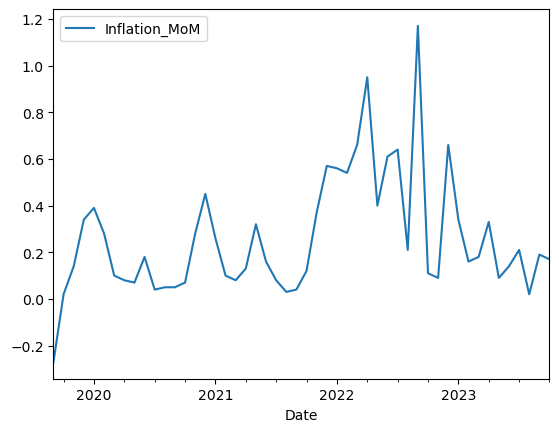

In [34]:
df.plot.line(x='Date', y='Inflation_MoM')

Inflation YoY Fluctuations Diagram

<AxesSubplot:xlabel='Date'>

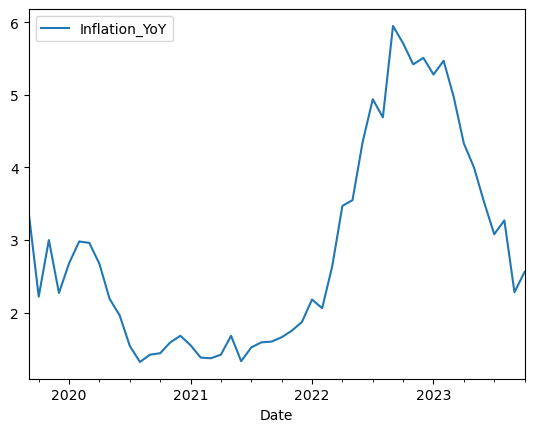

In [35]:
df.plot.line(x='Date', y='Inflation_YoY')

Inflations rate Fluctuations Diagram

<AxesSubplot:xlabel='Date'>

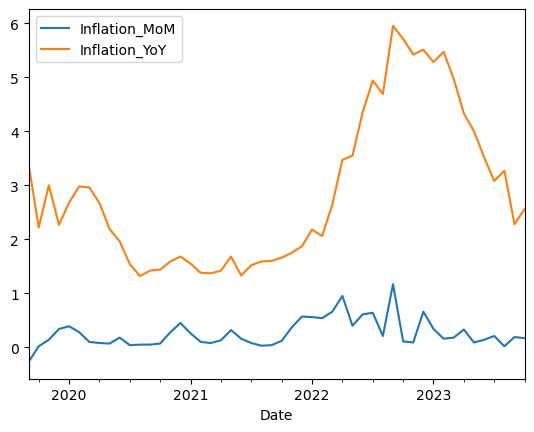

In [36]:
df.plot.line(x='Date', y=['Inflation_MoM', 'Inflation_YoY'])

> Based on the Diagram, we can conclude that the highest Inflation rate MoM and YoY was in 2022-09-30